In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [50]:
sen_attr_dict = {
    'adult': 'sex',
    'compas': 'sex',
    'bank': 'age',
    'retiring_adult': 'race',
    'retiring_adult_coverage': 'race'
}

In [51]:
dataset = 'adult'
sen_attr = sen_attr_dict[dataset]
option = 'fair_only' # 'fair_only', 'intersect'
k_arr = np.arange(0.1, 1.1, 0.1) # np.arange(0.1, 1.1, 0.1) or np.arange(1, 21, 1)
#k_arr = np.arange(1, 21, 1)
seed_arr = [0, 1, 2, 3, 4]

In [52]:
# naive

trng_acc_list = np.array([])
trng_fair_list = np.array([])

val_acc_list = np.array([])
val_fair_list = np.array([])

test_acc_list = np.array([])
test_fair_list = np.array([])

for seed in seed_arr:
    with open(f"./log/fair_only/{dataset}_seed_{seed}_sen_attr_{sen_attr}_naive_log.txt", "rb") as fp:
        log = pickle.load(fp)
        max_idx = np.argmax(np.array(log[0]))
        
        trng_acc_list = np.append(trng_acc_list, log[0][max_idx])
        trng_fair_list = np.append(trng_fair_list, log[1][max_idx])
        val_acc_list = np.append(val_acc_list, log[2][max_idx])
        val_fair_list = np.append(val_fair_list, log[3][max_idx])
        test_acc_list = np.append(test_acc_list, log[4][max_idx])
        test_fair_list = np.append(test_fair_list, log[5][max_idx])
        
naive_trng_acc = np.mean(trng_acc_list)
naive_trng_fair = np.mean(trng_fair_list)
naive_val_acc = np.mean(val_acc_list)
naive_val_fair = np.mean(val_fair_list)
naive_test_acc = np.mean(test_acc_list)
naive_test_fair = np.mean(test_fair_list)
        
print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")
    

Average Trng Acc: 0.8657221747544707, Average Trng Fair: 0.07751339708108577
Average Val Acc: 0.8582365948037591, Average Val Fair: 0.08370451784578008
Average Test Acc: 0.8498175787728026, Average Test Fair: 0.05560558540921714


In [53]:
# Top k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])


for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in seed_arr:
            with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_acc_fair_log.txt", "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



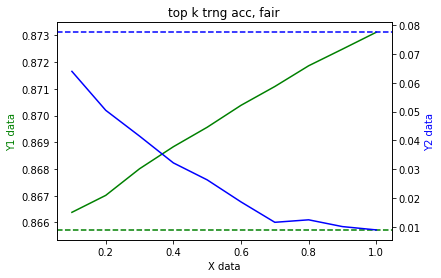

In [54]:
x = k_arr
y1 = trng_acc_list_by_k
y2 = trng_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_trng_acc, color='g', linestyle='--')
ax2.axhline(y=naive_trng_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("top k trng acc, fair")

plt.show()

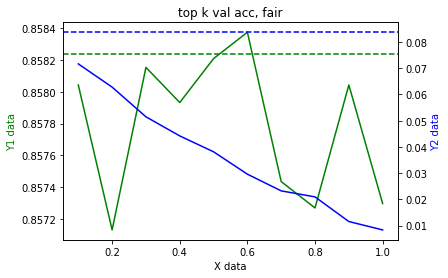

In [55]:
x = k_arr
y1 = val_acc_list_by_k
y2 = val_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_val_acc, color='g', linestyle='--')
ax2.axhline(y=naive_val_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("top k val acc, fair")

plt.show()

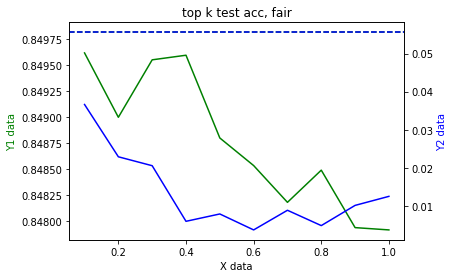

In [56]:
x = k_arr
y1 = test_acc_list_by_k
y2 = test_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_test_acc, color='g', linestyle='--')
ax2.axhline(y=naive_test_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("top k test acc, fair")

plt.show()

In [57]:
# Top k Removed data info

for k in k_arr:
    data_cnt = np.zeros((2, 2))
    for seed in seed_arr:
        with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_removed_data_info.txt", "rb") as fp:
            log = pickle.load(fp).ravel()
            data_cnt[0][0] += log[0]
            data_cnt[0][1] += log[1]
            data_cnt[1][0] += log[2]
            data_cnt[1][1] += log[3]
            
    print("k: {:.1f}\n".format(k), data_cnt / len(seed_arr))

k: 0.1
 [[27.6  0. ]
 [ 0.4  0. ]]
k: 0.2
 [[56.2  0. ]
 [ 0.8  0. ]]
k: 0.3
 [[83.8  0. ]
 [ 1.   1.2]]
k: 0.4
 [[111.4   0. ]
 [  1.2   2.4]]
k: 0.5
 [[131.8   0. ]
 [  2.6   9.6]]
k: 0.6
 [[150.    0. ]
 [  4.2  18.8]]
k: 0.7
 [[168.    0. ]
 [  6.2  27.8]]
k: 0.8
 [[180.4   0. ]
 [  7.8  42.8]]
k: 0.9
 [[192.6   0. ]
 [ 10.   57.4]]
k: 1.0
 [[204.2   0. ]
 [ 11.8  73. ]]


In [58]:
# Top k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in seed_arr:
        with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_confusion_matrix.txt", "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= len(seed_arr)
    val_g1 /= len(seed_arr)
    test_g0 /= len(seed_arr)
    test_g1 /= len(seed_arr)
    
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[1][0]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[1][0]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[1][0]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[1][0]+test_g1[1][1]))
    

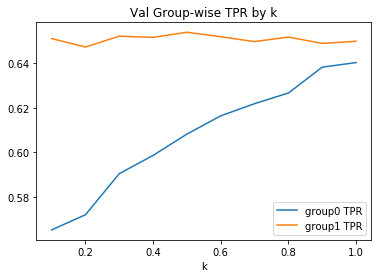

In [59]:
plt.plot(k_arr, val_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

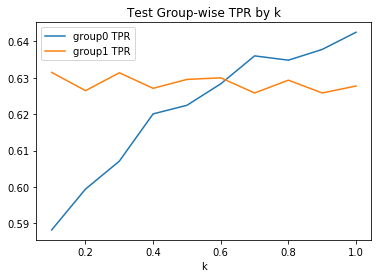

In [60]:
plt.plot(k_arr, test_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()

In [61]:
# Bottom k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])


for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in seed_arr:
            with open(f"./log/{option}/{dataset}_seed_{seed}_bottom_k_{k:.1f}_sen_attr_{sen_attr}_acc_fair_log.txt", "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



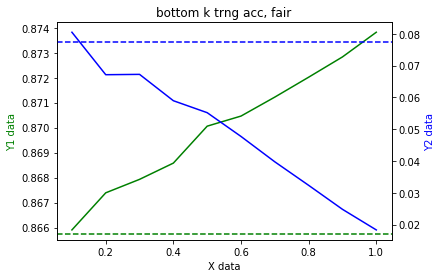

In [62]:
x = k_arr
y1 = trng_acc_list_by_k
y2 = trng_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_trng_acc, color='g', linestyle='--')
ax2.axhline(y=naive_trng_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k trng acc, fair")

plt.show()

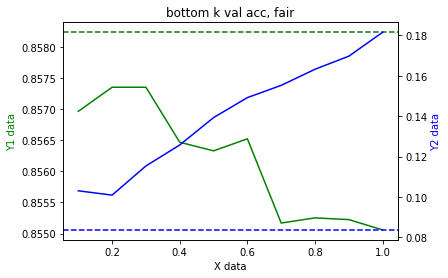

In [63]:
x = k_arr
y1 = val_acc_list_by_k
y2 = val_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_val_acc, color='g', linestyle='--')
ax2.axhline(y=naive_val_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k val acc, fair")

plt.show()

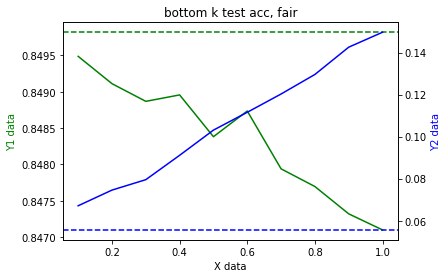

In [64]:
x = k_arr
y1 = test_acc_list_by_k
y2 = test_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.axhline(y=naive_test_acc, color='g', linestyle='--')
ax2.axhline(y=naive_test_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k test acc, fair")

plt.show()

In [65]:
# Bottom k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in seed_arr:
        with open(f"./log/{option}/{dataset}_seed_{seed}_bottom_k_{k:.1f}_sen_attr_{sen_attr}_confusion_matrix.txt", "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= len(seed_arr)
    val_g1 /= len(seed_arr)
    test_g0 /= len(seed_arr)
    test_g1 /= len(seed_arr)
    
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[1][0]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[1][0]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[1][0]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[1][0]+test_g1[1][1]))
    

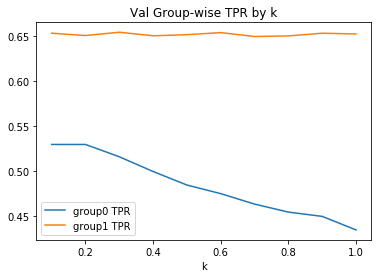

In [66]:
plt.plot(k_arr, val_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

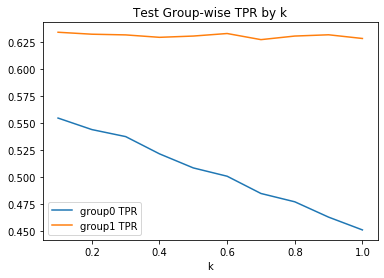

In [67]:
plt.plot(k_arr, test_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()